In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
box_office_df = pd.read_csv('../data/box_office.csv')
box_office_df

,Unnamed: 0,Date,Releases,#1 Release,Gross,Year,Country
0,0,Dec 29-31,34,Star Wars: Episode VIII - The Last Jedi,"$33,536,057",2017,United Kingdom
1,1,Dec 22-24,33,Star Wars: Episode VIII - The Last Jedi,"$39,922,932",2017,United Kingdom
2,2,Dec 15-17,48,Star Wars: Episode VIII - The Last Jedi,"$42,685,242",2017,United Kingdom
3,3,Dec 8-10,61,Paddington 2,"$8,393,949",2017,United Kingdom
4,4,Dec 1-3,57,Paddington 2,"$14,457,631",2017,United Kingdom
...,...,...,...,...,...,...,...
3341,1979,Jan 5,21,Spider-Man: No Way Home,"$4,383,219",2022,America
3342,1980,Jan 4,22,Spider-Man: No Way Home,"$5,918,802",2022,America
3343,1981,Jan 3,21,Spider-Man: No Way Home,"$7,908,732",2022,America
3344,1982,Jan 2,24,Spider-Man: No Way Home,"$17,502,959",2022,America


In [3]:
covid_df = pd.read_csv('../data/covid_data.csv')
covid_df

,Unnamed: 0,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths,Year
0,0,2020-01-22,Afghanistan,NaN,0,0.0,0,2020
1,1,2020-01-23,Afghanistan,NaN,0,0.0,0,2020
2,2,2020-01-24,Afghanistan,NaN,0,0.0,0,2020
3,3,2020-01-25,Afghanistan,NaN,0,0.0,0,2020
4,4,2020-01-26,Afghanistan,NaN,0,0.0,0,2020
...,...,...,...,...,...,...,...,...
231739,231739,2022-04-12,Zimbabwe,NaN,247094,0.0,5460,2022
231740,231740,2022-04-13,Zimbabwe,NaN,247160,0.0,5460,2022
231741,231741,2022-04-14,Zimbabwe,NaN,247208,0.0,5462,2022
231742,231742,2022-04-15,Zimbabwe,NaN,247237,0.0,5462,2022


Line graph: sum of realeases and confirmed cases over the years

Creating box office dataframe for line graph

In [14]:
box_release_total = box_office_df.groupby(['Year'], as_index=False,).agg({'Releases':'sum'})
box_release_total

,Year,Releases
0,2017,27530
1,2018,29557
2,2019,29922
3,2020,14993
4,2021,19722
5,2022,9981


Creating covid dataframe for line graph

In [15]:
covid_case_total = covid_df.groupby(['Year'], as_index=False,).agg({'Confirmed':'sum'})
covid_case_total

,Year,Confirmed
0,2020,7639815886
1,2021,67130394607
2,2022,44169193021


concatenating both dataframes

In [6]:
box_covid_total = [box_release_total, covid_case_total]
  
box_covid_total = pd.concat(box_covid_total)
box_covid_total

,Year,Releases,Confirmed
0,2017,27530.0,NaN
1,2018,29557.0,NaN
2,2019,29922.0,NaN
3,2020,14993.0,NaN
4,2021,19722.0,NaN
5,2022,9981.0,NaN
0,2020,NaN,7.639816e+09
1,2021,NaN,6.713039e+10
2,2022,NaN,4.416919e+10


Cleaning data

In [7]:
box_covid_total["Covid"] = box_covid_total['Confirmed'].shift(periods=-3)
box_covid_total

,Year,Releases,Confirmed,Covid
0,2017,27530.0,NaN,NaN
1,2018,29557.0,NaN,NaN
2,2019,29922.0,NaN,NaN
3,2020,14993.0,NaN,7.639816e+09
4,2021,19722.0,NaN,6.713039e+10
5,2022,9981.0,NaN,4.416919e+10
0,2020,NaN,7.639816e+09,NaN
1,2021,NaN,6.713039e+10,NaN
2,2022,NaN,4.416919e+10,NaN


In [8]:
box_covid_total = box_covid_total.drop(['Confirmed'], axis = 1)
box_covid_total

,Year,Releases,Covid
0,2017,27530.0,NaN
1,2018,29557.0,NaN
2,2019,29922.0,NaN
3,2020,14993.0,7.639816e+09
4,2021,19722.0,6.713039e+10
5,2022,9981.0,4.416919e+10
0,2020,NaN,NaN
1,2021,NaN,NaN
2,2022,NaN,NaN


In [9]:
box_covid_total['Releases'] = box_covid_total['Releases'].fillna(0)
box_covid_total['Covid'] = box_covid_total['Covid'].fillna(0)
box_covid_total

,Year,Releases,Covid
0,2017,27530.0,0.000000e+00
1,2018,29557.0,0.000000e+00
2,2019,29922.0,0.000000e+00
3,2020,14993.0,7.639816e+09
4,2021,19722.0,6.713039e+10
5,2022,9981.0,4.416919e+10
0,2020,0.0,0.000000e+00
1,2021,0.0,0.000000e+00
2,2022,0.0,0.000000e+00


In [10]:
box_covid_total.rename(columns = {'Releases':'Box Office'}, inplace = True)
box_covid_total

,Year,Box Office,Covid
0,2017,27530.0,0.000000e+00
1,2018,29557.0,0.000000e+00
2,2019,29922.0,0.000000e+00
3,2020,14993.0,7.639816e+09
4,2021,19722.0,6.713039e+10
5,2022,9981.0,4.416919e+10
0,2020,0.0,0.000000e+00
1,2021,0.0,0.000000e+00
2,2022,0.0,0.000000e+00


In [11]:
N = 3
box_covid_total = box_covid_total.head(box_covid_total.shape[0] -N)
box_covid_total

,Year,Box Office,Covid
0,2017,27530.0,0.000000e+00
1,2018,29557.0,0.000000e+00
2,2019,29922.0,0.000000e+00
3,2020,14993.0,7.639816e+09
4,2021,19722.0,6.713039e+10
5,2022,9981.0,4.416919e+10


Line graph: sum of realeases and confirmed cases over the years

In [12]:
year = box_covid_total[box_covid_total['Year'].isin([2017, 2018, 2019, 2020, 2021, 2022])]
year = range(len(year))

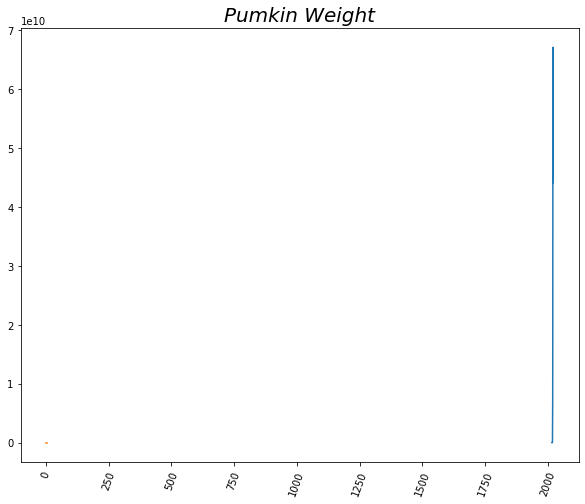

In [13]:
box = box_covid_total['Box Office']
covid = box_covid_total['Covid']
year = box_covid_total['Year']
plt.subplots(figsize=(10,8))
plt.plot(year, covid, box)
plt.title('Pumkin Weight', fontsize=20, fontstyle='oblique')
plt.xticks(rotation = 70)
plt.show()